# MAGNets Example

We will demonstrate reducing the hydraulic model of network KY2 <br>
(available here: https://github.com/meghnathomas/MAGNets/tree/master/examples/networks). <br>
Make sure to place the `'ky2.inp'` file into the same directory as this `.ipynb` file or replace `inp_file` in cell [3] with the entire file path name for KY2.

### Import packages

In [1]:
import magnets as mg
import time
import wntr 
import matplotlib.pyplot as plt
import networkx.drawing.nx_pylab as nxp

### Network plotting

In [2]:
# We will use this function to plot the networks
# Red squares represent reservoirs and blue hexagons represent tanks

def plot_network(wn, title, num):

    G = wn.get_graph()
    G_edge_list = list(G.edges())

    pos_dict = {}
    for node_name, node in wn.nodes():
        pos_dict[node_name] = node.coordinates
                  
    plt.sca(ax[num])
    nxp.draw_networkx_nodes(G, pos_dict, node_size = 5, node_color = 'k', ax = ax[num])
    nxp.draw_networkx_nodes(G, pos_dict, nodelist = wn.tank_name_list, node_size = 30, node_color = 'b', node_shape = 'h', ax = ax[num])
    nxp.draw_networkx_nodes(G, pos_dict, nodelist = wn.reservoir_name_list, node_size = 30, node_color = 'r', node_shape = 's', ax = ax[num])
    nxp.draw_networkx_edges(G, pos_dict, edgelist = G_edge_list, edge_color = 'k', width = 1, arrows = False, ax = ax[num])
    ax[num].set_axis_off
    ax[num].set_title(title)

### Getting started

MAGNets' `reduce_model` function allows the user to reduce the hydraulic model of a water distribution network (WDN) to a hydraulically equivalent model with fewer nodes. 

The inputs of the `reduce_model` function include:
1. `inp_file`: the EPANET-compatible .inp file of the water distribution network model.
2. `op_pt`: (optional, default = 0) the operating point, or the reporting time step of the hydraulic simulation at which the non-linear headloss equations are linearized.
3. `nodes_to_keep`: (optional, default = []) a list of nodes the user wishes to retain in the reduced model.
4. `max_nodal_degree`: (optional, default = None) the maximum nodal degree of nodes being removed from the model. The nodal degree of a node is equal to the number of pipes incident to the node.

The outputs of the `reduce_model` function include:
1. water network model object of the reduced network model
2. .inp file of the reduced network written into the folder it is located in. 

### Basic model reduction
In this example, we demonstrate how to reduce a network model without proving any optional input. We plot the original and reduced networks, as well as number of nodes and links, and the running time. 

Total reduction time: 6.13 s
Number of junctions in the original network:  811  vs. number of junctions in the reduced network:  5 
Number of pipes in the original network:  1124  vs. number of pipes in the reduced network:  10 


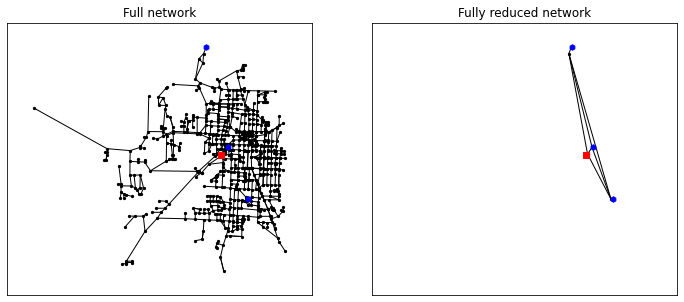

In [3]:
# Define .INP file of network model to be reduced
inp_file = 'ky2.inp'

# Call model reduction function
t1 = time.time()
mg1 = mg.reduction.reduce_model(inp_file)
t2 = time.time()

# Plot the original network
fig, ax = plt.subplots(1, 2, figsize=(12,5))
wn = wntr.network.WaterNetworkModel('ky2.inp')
plot_network(wn, 'Full network', 0)

# Plot the reduced network
wn2 = wntr.network.WaterNetworkModel('reduced 0 ky2.inp') 
plot_network(wn2, 'Fully reduced network', 1)
plt.setp(ax, ylim=ax[0].get_ylim())
plt.setp(ax, xlim=ax[0].get_xlim())

# Display reduction time and number of elements
print('Total reduction time:', str(round(t2-t1, 2)), 's')
print('Number of junctions in the original network:', "\033[1m", wn.num_junctions, "\033[0;0m", 'vs. number of junctions in the reduced network:',"\033[1m", wn2.num_junctions, "\033[0;0m")
print('Number of pipes in the original network:', "\033[1m",wn.num_pipes,"\033[0;0m", 'vs. number of pipes in the reduced network:',"\033[1m", wn2.num_pipes, "\033[0;0m")

### Provide operating point and a list of nodes to keep
In this example, we demonstrate how to reduce a network model proving an operating point and a list of nodes to keep in the reduced model. We plot the original and reduced networks, as well as number of nodes and links, and the running time.

Total reduction time: 7.35 s
Number of junctions in the original network:  811  vs. number of junctions in the reduced network:  7 
Number of pipes in the original network:  1124  vs. number of pipes in the reduced network:  19 


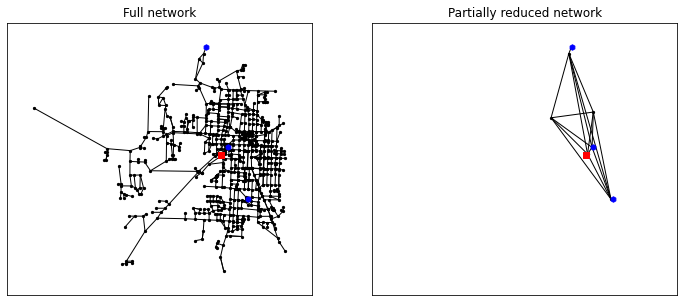

In [4]:
# Specify operating point (optional)
op_pt = 3

# Specify list of nodes to keep (optional)
list_of_nodes_to_keep = ['J-103','J-50']

# Specify maximum nodal degree of nodes being removed from the model (optional)
# max_nodal_degree = 1 indicates removal of only branches and merging of parallel pipes
# max_nodal_degree = 2 indicates removal of branches, merging of parallel pipes, and merging of pipes in series
max_nodal_degree = None 

# Call model reduction function
t1 = time.time()
mg2 = mg.reduction.reduce_model(inp_file, op_pt, list_of_nodes_to_keep, max_nodal_degree)
t2 = time.time()

# Plot the original network
fig, ax = plt.subplots(1, 2, figsize=(12,5))
wn = wntr.network.WaterNetworkModel('ky2.inp')
plot_network(wn, 'Full network', 0)

# Plot the reduced network
wn3 = wntr.network.WaterNetworkModel('reduced 3 ky2.inp') 
plot_network(wn3, 'Partially reduced network', 1)
plt.setp(ax, ylim=ax[0].get_ylim())
plt.setp(ax, xlim=ax[0].get_xlim())

# Display reduction time and number of elements
print('Total reduction time:', str(round(t2-t1, 2)), 's')
print('Number of junctions in the original network:', "\033[1m", wn.num_junctions, "\033[0;0m", 'vs. number of junctions in the reduced network:',"\033[1m", wn3.num_junctions, "\033[0;0m")
print('Number of pipes in the original network:', "\033[1m",wn.num_pipes,"\033[0;0m", 'vs. number of pipes in the reduced network:',"\033[1m", wn3.num_pipes, "\033[0;0m")

## Remove all branches
In this example, we demonstrate how to reduce a network model by removing all nodes with node degree equal to 1 (i.e., branches). We plot the original and reduced networks, as well as number of nodes and links, and the running time.

Total reduction time: 1.75 s
Number of junctions in the original network:  811  vs. number of junctions in the reduced network:  593 
Number of pipes in the original network:  1124  vs. number of pipes in the reduced network:  897 


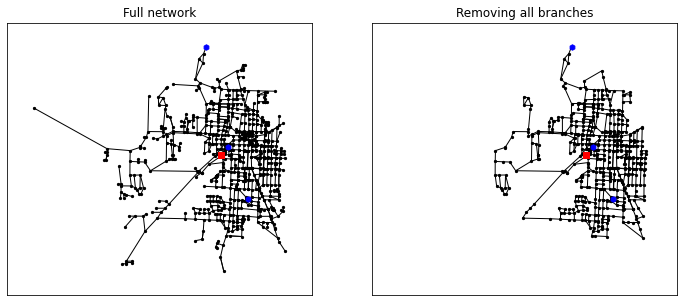

In [5]:
#Specify maximum nodal degree in reduced model (optional)
max_nodal_degree = 1 

# Call model reduction function
t1 = time.time()
mg3 = mg.reduction.reduce_model(inp_file, None, None, max_nodal_degree)
t2 = time.time()

# Plot the original network
fig, ax = plt.subplots(1, 2, figsize=(12,5))
wn = wntr.network.WaterNetworkModel('ky2.inp')
plot_network(wn, 'Full network', 0)

# Plot the reduced network
plot_network(mg3, 'Removing all branches', 1)
plt.setp(ax, ylim=ax[0].get_ylim())
plt.setp(ax, xlim=ax[0].get_xlim())

# Display reduction time and number of elements
print('Total reduction time:', str(round(t2-t1, 2)), 's')
print('Number of junctions in the original network:', "\033[1m", wn.num_junctions, "\033[0;0m", 'vs. number of junctions in the reduced network:',"\033[1m", mg3.num_junctions, "\033[0;0m")
print('Number of pipes in the original network:', "\033[1m",wn.num_pipes,"\033[0;0m", 'vs. number of pipes in the reduced network:',"\033[1m", mg3.num_pipes, "\033[0;0m")

### Remove all branches and pipes in series
In this example, we demonstrate how to reduce a network model by removing all nodes with node degree equal or less than 2 (i.e., all branches and pipes in series). We plot the original and reduced networks, as well as number of nodes and links, and the running time.

Total reduction time: 1.82 s
Number of junctions in the original network:  811  vs. number of junctions in the reduced network:  459 
Number of pipes in the original network:  1124  vs. number of pipes in the reduced network:  752 


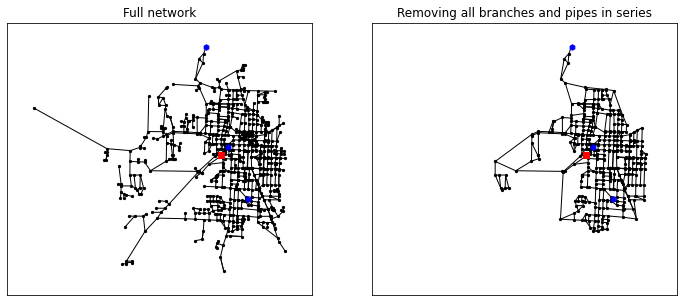

In [6]:
# Specify maximum nodal degree in reduced model
max_nodal_degree = 2 

# Call model reduction function
t1 = time.time()
mg4 = mg.reduction.reduce_model(inp_file, None, None, max_nodal_degree)
t2 = time.time()

# Plot the original network
fig, ax = plt.subplots(1, 2, figsize=(12,5))
wn = wntr.network.WaterNetworkModel('ky2.inp')
plot_network(wn, 'Full network', 0)
plt.setp(ax, ylim=ax[0].get_ylim())
plt.setp(ax, xlim=ax[0].get_xlim())

# Plot the reduced network
plot_network(mg4, 'Removing all branches and pipes in series', 1)

# Display reduction time and number of elements
print('Total reduction time:', str(round(t2-t1, 2)), 's')
print('Number of junctions in the original network:', "\033[1m", wn.num_junctions, "\033[0;0m", 'vs. number of junctions in the reduced network:',"\033[1m", mg4.num_junctions, "\033[0;0m")
print('Number of pipes in the original network:', "\033[1m",wn.num_pipes,"\033[0;0m", 'vs. number of pipes in the reduced network:',"\033[1m", mg4.num_pipes, "\033[0;0m")